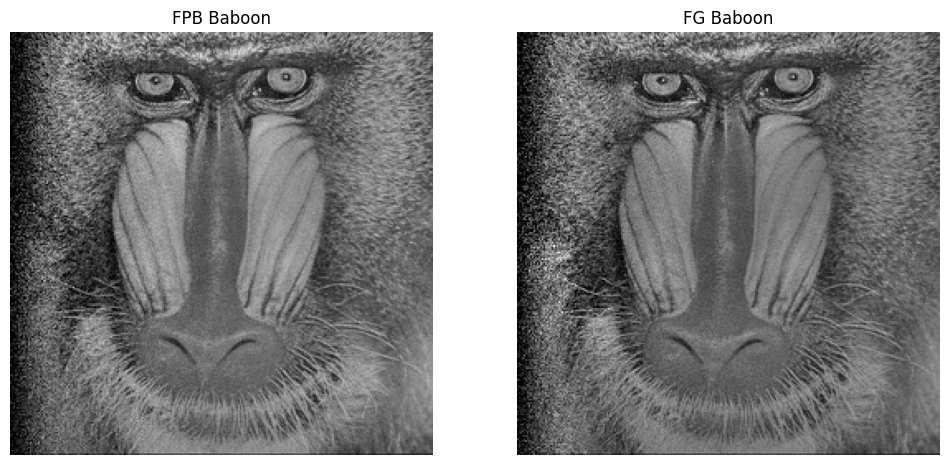

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline

# leer la imagen de Baboo original
imagen_original = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/baboon.jpg")
# Debemos cumplir con la siguiente formula g(x,y) = f(x,y)h(x,y)+n(x)
# Convertir la imagen de Baboo original a escala de grises. Ésta será nuestra f(x,y)
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)

# Leer las f_estimadas
FPB_Baboon = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/FPB_Baboon_Gradiente_fEstimada.jpg")
FG_Baboon = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/FG_Baboon_Gradiente_fEstimada.jpg")
imagen_con_ruido = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/imagen_con_ruido.jpg")

# Calcular histogramas
histograma_FPB_Baboon = cv2.calcHist([FPB_Baboon], [0], None, [256], [0, 256])
histograma_FG_Baboon = cv2.calcHist([FG_Baboon], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(FPB_Baboon, cmap="gray")
plt.title("FPB Baboon")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(FG_Baboon, cmap="gray")
plt.title("FG Baboon")
plt.axis('off')
         
plt.show()

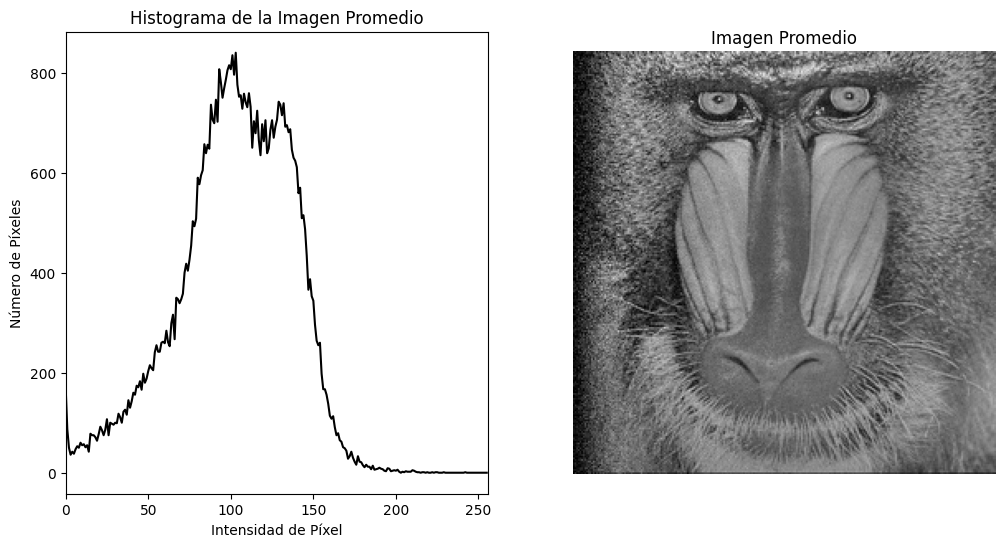

In [10]:
FPB_Baboon_float = FPB_Baboon.astype(np.float64)
FG_Baboon_float = FG_Baboon.astype(np.float64)

promedio = (cv2.add(FPB_Baboon_float, FG_Baboon_float))/2
promedio = promedio.astype('uint8')

histograma_promedio = cv2.calcHist([promedio], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_promedio, color='black')
plt.title("Histograma de la Imagen Promedio")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(promedio, cmap="gray")
plt.title("Imagen Promedio")
plt.axis('off')

plt.show()

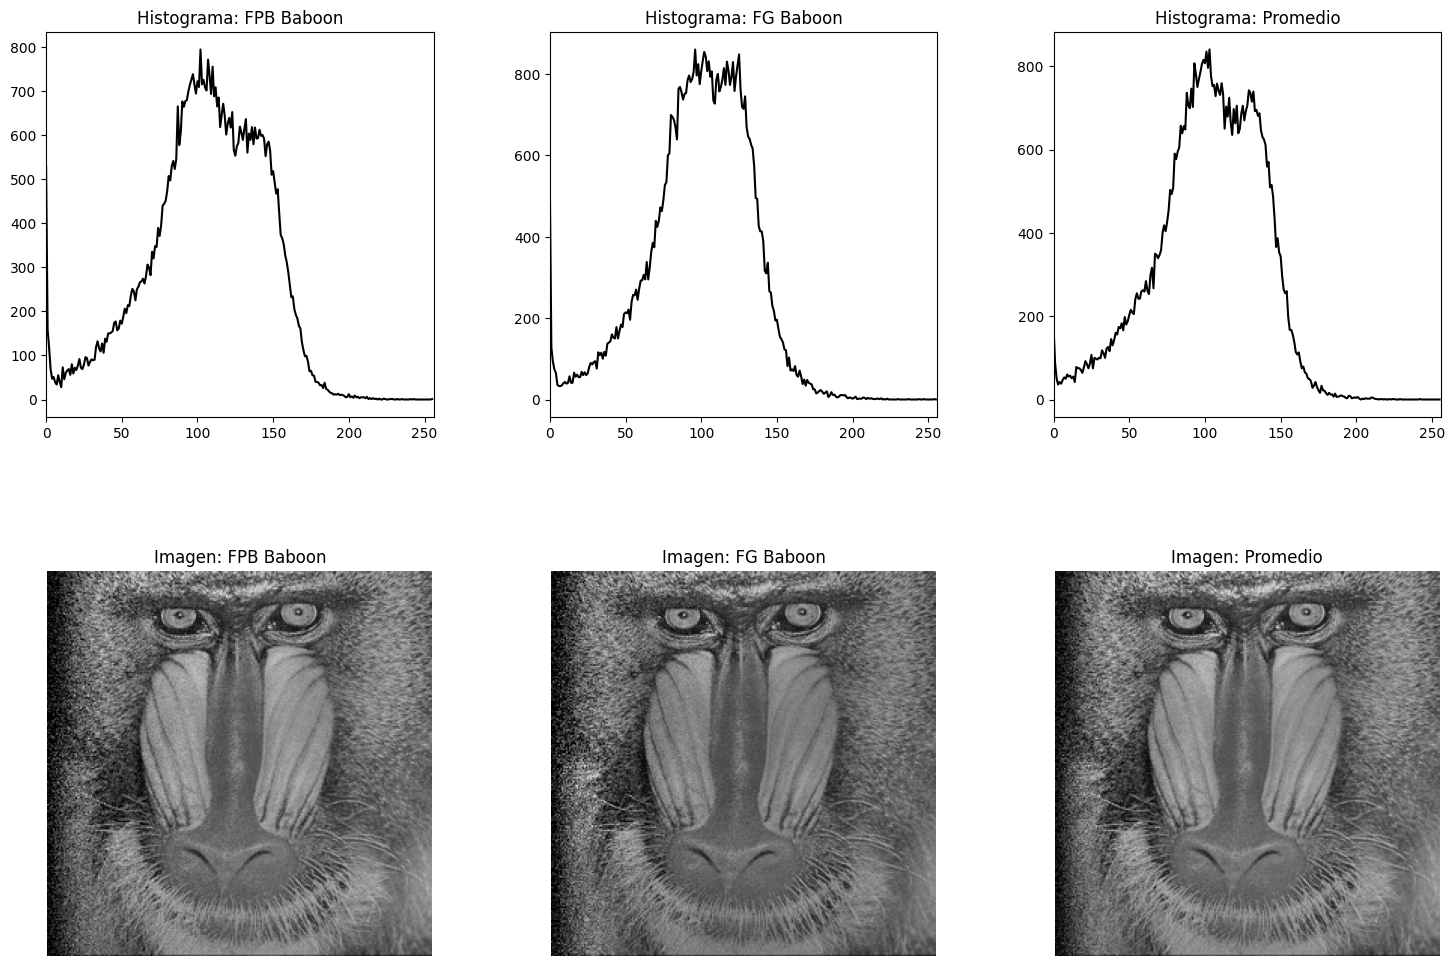

In [11]:
# Configura la figura para tener 2 filas y 3 columnas, ajustando el tamaño total
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Ajustar el espacio entre gráficos
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Primer par: Histograma e imagen en escala de grises
axs[0, 0].plot(histograma_FPB_Baboon, color='black')
axs[0, 0].set_title("Histograma: FPB Baboon")
axs[0, 0].set_xlim([0, 256])

axs[1, 0].imshow(FPB_Baboon, cmap="gray")
axs[1, 0].set_title("Imagen: FPB Baboon")
axs[1, 0].axis('off')

# Segundo par: Histograma e imagen con iluminación
axs[0, 1].plot(histograma_FG_Baboon, color='black')
axs[0, 1].set_title("Histograma: FG Baboon")
axs[0, 1].set_xlim([0, 256])

axs[1, 1].imshow(FG_Baboon, cmap="gray")
axs[1, 1].set_title("Imagen: FG Baboon")
axs[1, 1].axis('off')

# Tercer par: Histograma e imagen con iluminación y ruido
axs[0, 2].plot(histograma_promedio, color='black')
axs[0, 2].set_title("Histograma: Promedio")
axs[0, 2].set_xlim([0, 256])

axs[1, 2].imshow(promedio, cmap="gray")
axs[1, 2].set_title("Imagen: Promedio")
axs[1, 2].axis('off')

plt.show()

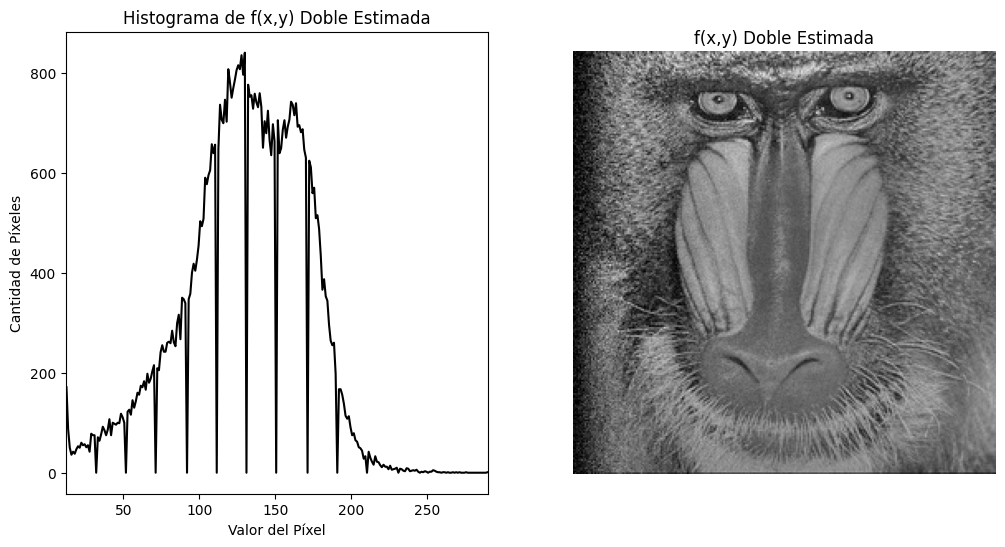

In [20]:
# A continuación realiazremos una normalización de nuestra f_estimada utilizando la media y desviación estandar de nuestra f(x,y)
f_estimada = promedio


# Se calcula la media y desviación estandar de g(x,y)
media_observada, desviacionEstandar_observada = cv2.meanStdDev(imagen_gris)

#print(f"Media g(x,y): {media_observada[0][0]}")
#print(f"Desviación estándar g(x,y): {desviacionEstandar_observada[0][0]} \n\n")

# Se calcula la media y desviación estandar de f(x,y) estimada
media_fEstimada, desviacionEstandar_fEstimada = cv2.meanStdDev(f_estimada)

#print(f"Media f(x,y) estimada: {media_pruebaUno[0][0]}")
#print(f"Desviación f(x,y) estimada: {desviacionEstandar_pruebaUno[0][0]}")

f_dobleEstimada = ((f_estimada - media_fEstimada) / desviacionEstandar_fEstimada) * desviacionEstandar_observada + media_observada

#print(f"F doble estimada es {f_dobleEstimada}")

conteos, bordes_bins = np.histogram(f_dobleEstimada.flatten(), bins=256, range=[np.min(f_dobleEstimada), np.max(f_dobleEstimada)])
centros_bins = (bordes_bins[:-1] + bordes_bins[1:]) / 2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(centros_bins, conteos, color='black')
plt.title("Histograma de f(x,y) Doble Estimada")
plt.xlabel("Valor del Píxel")
plt.ylabel("Cantidad de Píxeles")
# Ajusta los límites del eje x para que coincidan con el rango de datos de la imagen flotante
plt.xlim([np.min(f_dobleEstimada), np.max(f_dobleEstimada)])

# Ahora, muestra la imagen f_dobleEstimada en formato float64
plt.subplot(1, 2, 2)
plt.imshow(f_dobleEstimada, cmap='gray', vmin=np.min(f_dobleEstimada), vmax=np.max(f_dobleEstimada))
plt.title("f(x,y) Doble Estimada")
plt.axis('off')

plt.show()

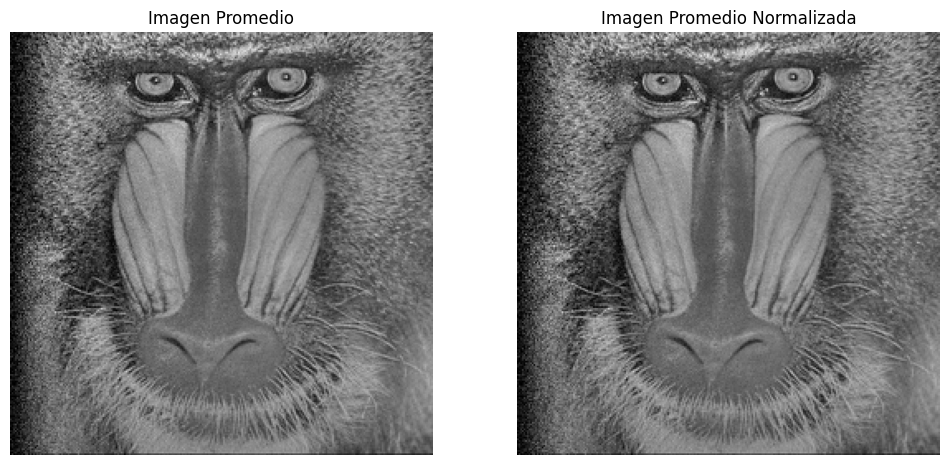

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(f_estimada, cmap="gray")
plt.title("Imagen Promedio")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(f_dobleEstimada, cmap="gray")
plt.title("Imagen Promedio Normalizada")
plt.axis('off')

plt.show()

In [22]:
# Aplicamos el RMSE como criterio de comparación

# Se calcula RMSE entre g(x,y) y f_estimada
if f_estimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse1 = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre f_estimada(x,y) y g(x,y) es: {rmse1}")

# Se calcula RMSE entre g(x,y) y f_doble_estimada
if f_dobleEstimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse2 = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre f_dobleEstimada(x,y) y g(x,y) es: {rmse2}")

El RMSE entre f_estimada(x,y) y g(x,y) es: 28.548444747924805
El RMSE entre f_dobleEstimada(x,y) y g(x,y) es: 28.548444747924805


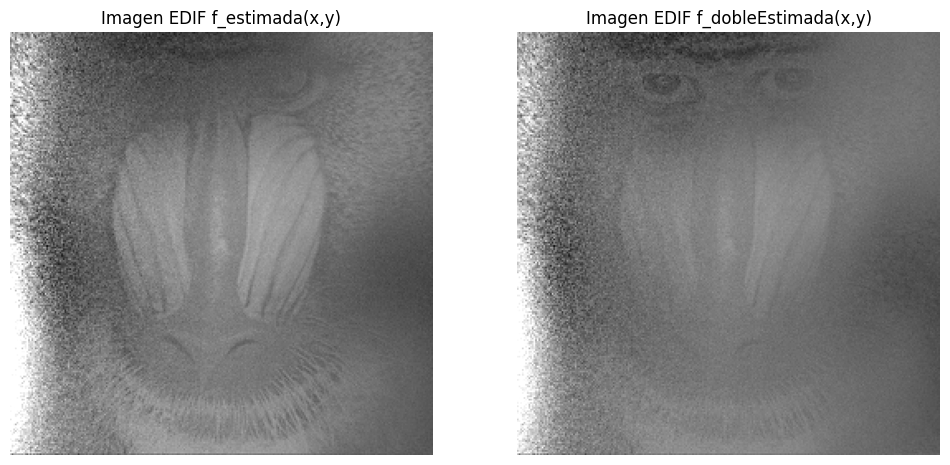

In [23]:
# Aplicamos el EDIF como criterio de comparación

plt.figure(figsize=(12, 6))

# Calcular y mostrar EDIF para f_estimada
diferencia1 = imagen_gris.astype(np.float32) - f_estimada.astype(np.float32)
c1 = 1
c2 = 128
edif1 = c1 * diferencia1 + c2
edif1_visual = np.clip(edif1, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(edif1_visual, cmap='gray')
plt.title('Imagen EDIF f_estimada(x,y)')
plt.axis('off')

# Calcular y mostrar EDIF para f_dobleEstimada
diferencia2 = imagen_gris.astype(np.float32) - f_dobleEstimada.astype(np.float32)
edif2 = c1 * diferencia2 + c2
edif2_visual = np.clip(edif2, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(edif2_visual, cmap='gray')
plt.title('Imagen EDIF f_dobleEstimada(x,y)')
plt.axis('off')

plt.show()

In [24]:
# Aplicamos el SNR como criterio de comparación



imagen_gris_float = imagen_gris.astype(np.float32)
f_estimada_float = f_estimada.astype(np.float32)
f_dobleEstimada_float = f_dobleEstimada.astype(np.float32)

numerador = np.sum(imagen_gris_float ** 2)
denominador = np.sum((imagen_gris_float - f_estimada_float) ** 2)
denominador2 = np.sum((imagen_gris_float - f_dobleEstimada_float) ** 2)

snr1 = numerador / denominador

print(f"El SNR para f_estimada es: {snr1}")

snr2 = numerador / denominador2

print(f"El SNR para f_dobleEstimada es: {snr2}")

El SNR para f_estimada es: 12.372154235839844
El SNR para f_dobleEstimada es: 22.482805252075195


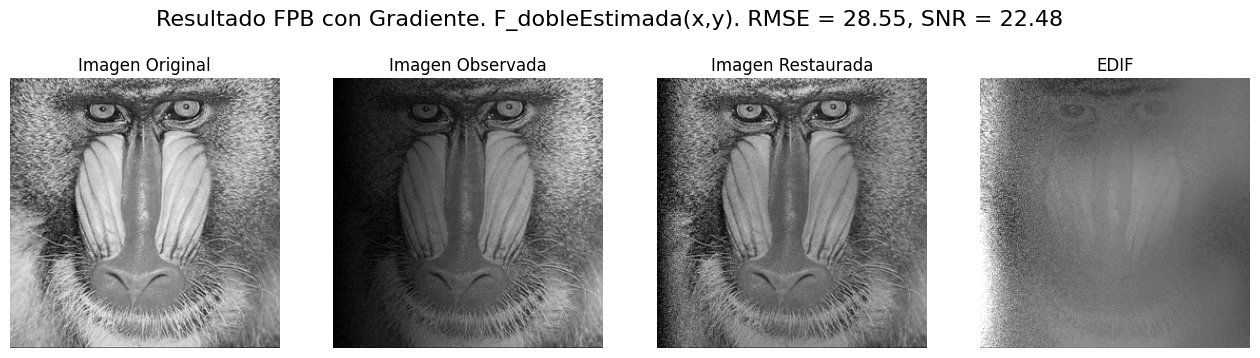

In [25]:
# Comparación de avances

plt.figure(figsize=(16, 8))

plt.suptitle(f"Resultado FPB con Gradiente. F_dobleEstimada(x,y). RMSE = {rmse2:.2f}, SNR = {snr2:.2f}", fontsize=16, y=0.75)

plt.subplot(1, 4, 1)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen Observada")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(f_dobleEstimada, cmap="gray")
plt.title("Imagen Restaurada")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edif2_visual, cmap="gray")
plt.title("EDIF")
plt.axis('off')

#plt.savefig("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/Resultados_FPA_Gradiente_Baboon.png", dpi=300, bbox_inches='tight')

plt.show()